#**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd

#**Importing Dataset**

In [4]:
thread = pd.read_csv("threads_reviews.csv")
thread

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


<Axes: >

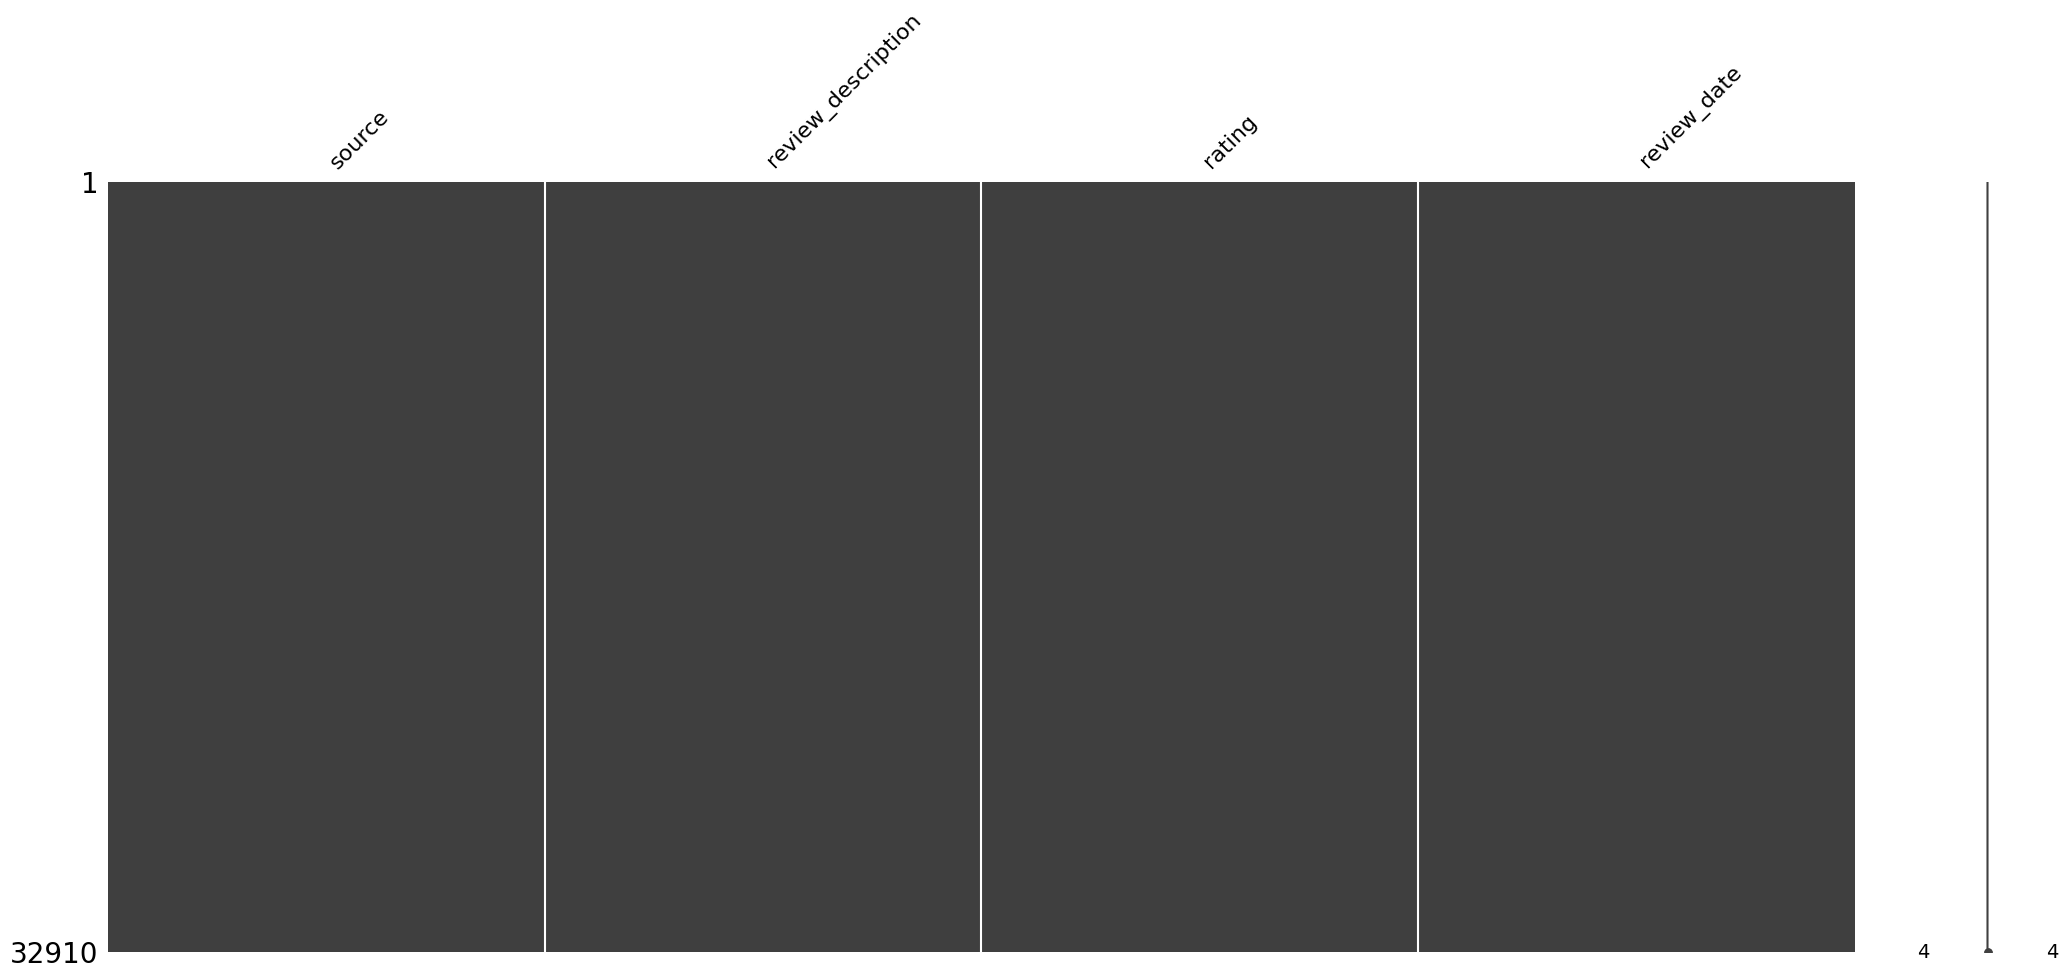

In [5]:
import missingno as msno   # check for missing values visually
msno.matrix(thread)

# **Exploration Data Analysis**

In [6]:
# Check the basic info
print(thread.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None


## **Summary statistics**

In [7]:
print(thread.describe())


             rating
count  32910.000000
mean       3.398481
std        1.751480
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000


## **Distribution of ratings**

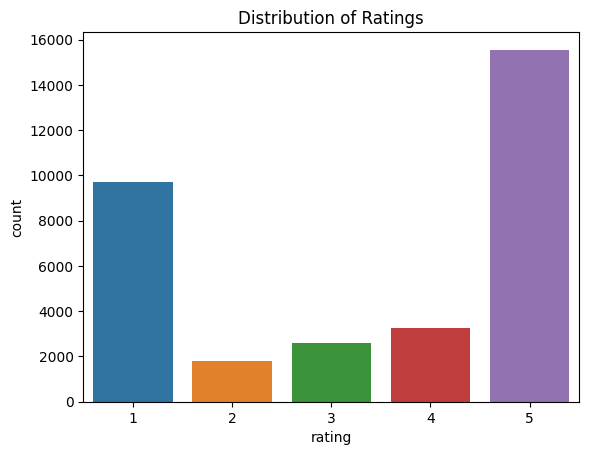

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=thread)
plt.title('Distribution of Ratings')
plt.show()


## **Distribution of review lengths**

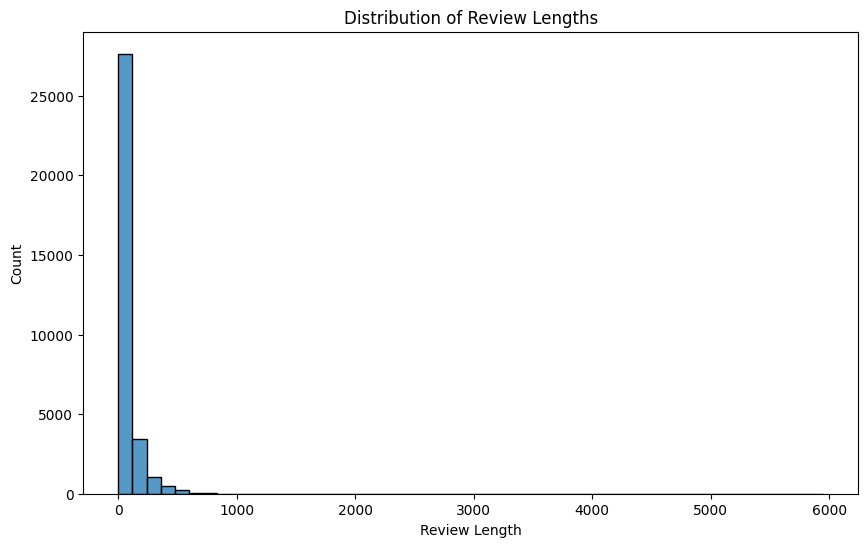

In [9]:
thread['review_length'] = thread['review_description'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=thread, x='review_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


## **Date-wise analysis**

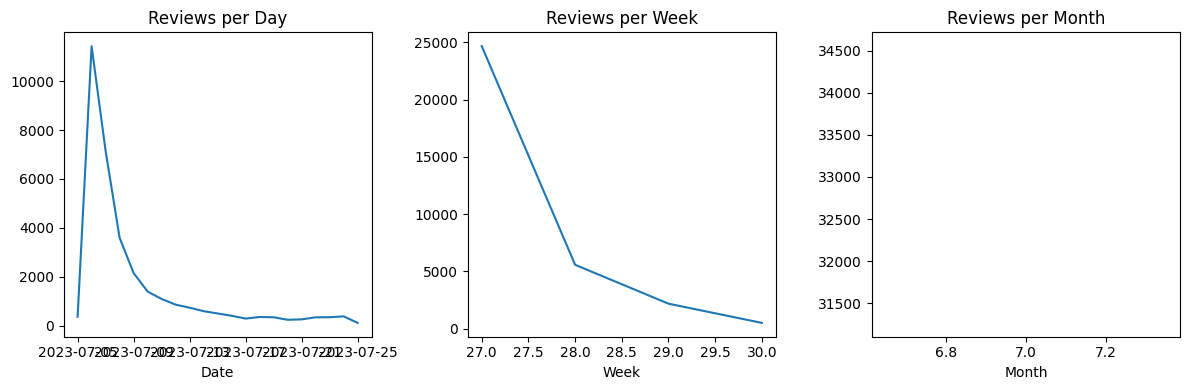

In [10]:
# Convert 'review_date' column to datetime type
thread['review_date'] = pd.to_datetime(thread['review_date'])

# Extract date, week, and month from 'review_date'
thread['date'] = thread['review_date'].dt.date
thread['week'] = thread['review_date'].dt.isocalendar().week
thread['month'] = thread['review_date'].dt.month

# Number of reviews per day
reviews_per_day = thread['date'].value_counts().sort_index()

# Number of reviews per week
reviews_per_week = thread['week'].value_counts().sort_index()

# Number of reviews per month
reviews_per_month = thread['month'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(reviews_per_day.index, reviews_per_day.values)
plt.title('Reviews per Day')
plt.xlabel('Date')

plt.subplot(132)
plt.plot(reviews_per_week.index, reviews_per_week.values)
plt.title('Reviews per Week')
plt.xlabel('Week')

plt.subplot(133)
plt.plot(reviews_per_month.index, reviews_per_month.values)
plt.title('Reviews per Month')
plt.xlabel('Month')

plt.tight_layout()
plt.show()


## **Word cloud**

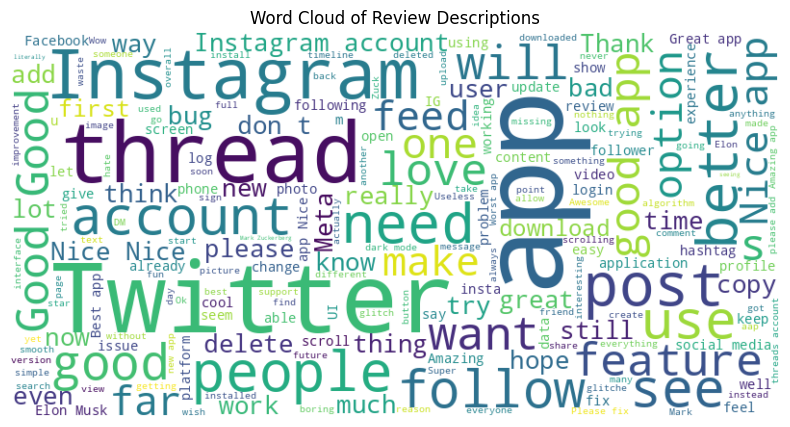

In [11]:
from wordcloud import WordCloud

text = ' '.join(thread['review_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Descriptions')
plt.show()


## **Pie chart showing the distribution of reviews by source**

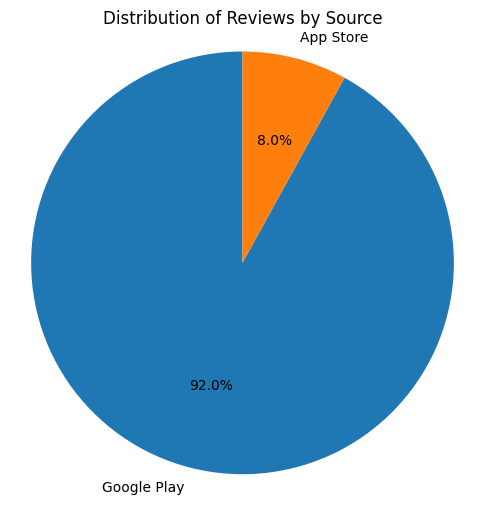

In [12]:
# Calculate the counts of each source
source_counts = thread['source'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Reviews by Source')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()


## **Review Collection By Dates**

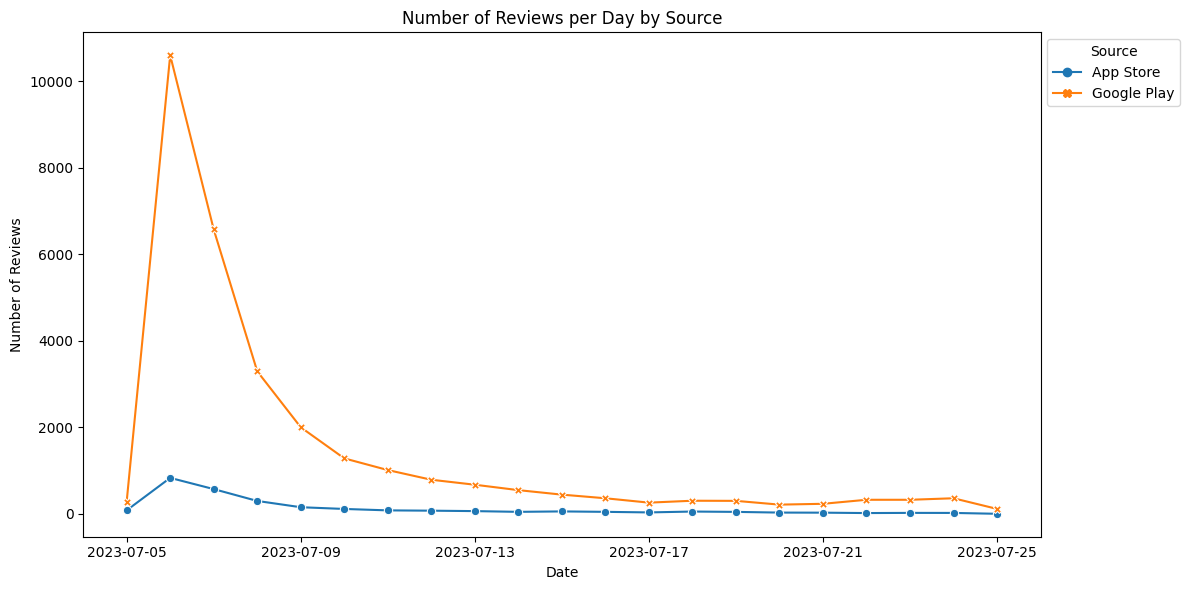

In [13]:
# Convert 'review_date' column to datetime type
thread['review_date'] = pd.to_datetime(thread['review_date'])

# Extract date and source
thread['date'] = thread['review_date'].dt.date

# Group by 'date' and 'source' to get the counts
reviews_by_date_and_source = thread.groupby(['date', 'source']).size().reset_index(name='count')

# Pivot the table to get sources as columns
pivot_table = reviews_by_date_and_source.pivot(index='date', columns='source', values='count')
pivot_table.fillna(0, inplace=True)  # Fill NaN values with 0

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True, dashes=False)
plt.title('Number of Reviews per Day by Source')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Source', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


## **Natural Language Processing**

### **Sentiment Analysis**

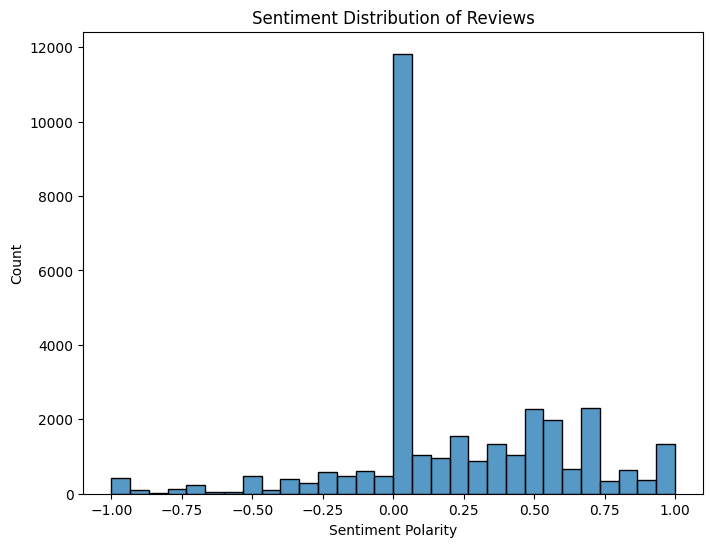

In [14]:
from textblob import TextBlob

# Perform sentiment analysis for each review
thread['sentiment'] = thread['review_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=thread, x='sentiment', bins=30)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


### **Word Frequency Analysis**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


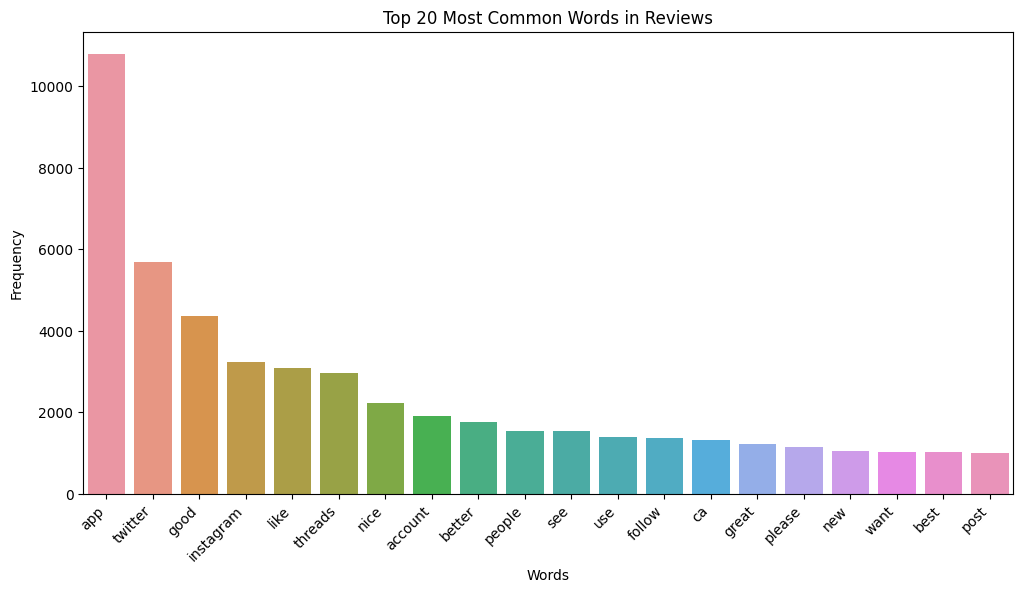

In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess text data
def preprocess_text(text):
    # Tokenize words
    words = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic characters
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Combine all reviews into a single text
all_reviews = ' '.join(thread['review_description'])

# Preprocess the text and get word frequencies
preprocessed_reviews = preprocess_text(all_reviews)
word_freq = Counter(preprocessed_reviews)

# Plot the word frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, count in word_freq.most_common(20)], y=[count for word, count in word_freq.most_common(20)])
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# **Machine leraning prediction of rating based on review description**

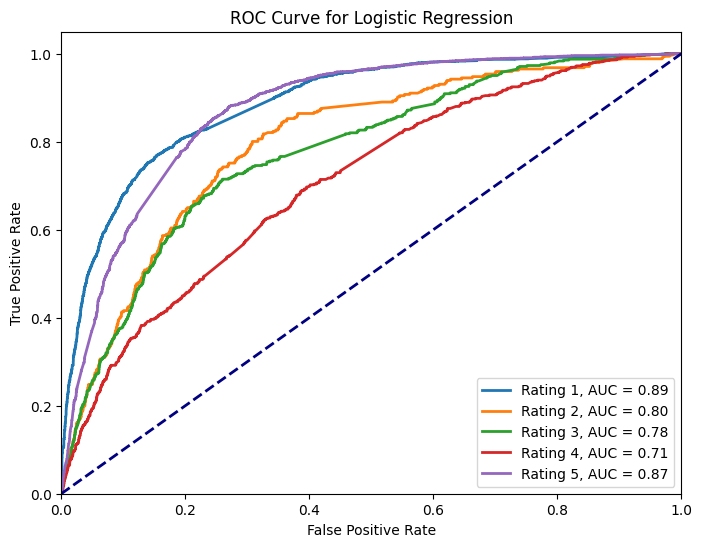

Accuracy: 0.68
Precision: 0.61
F1 Score: 0.63


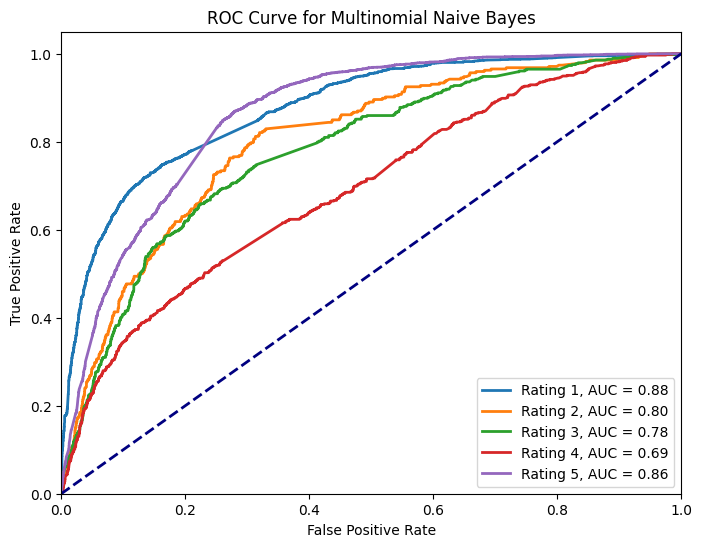

Accuracy: 0.67
Precision: 0.62
F1 Score: 0.62


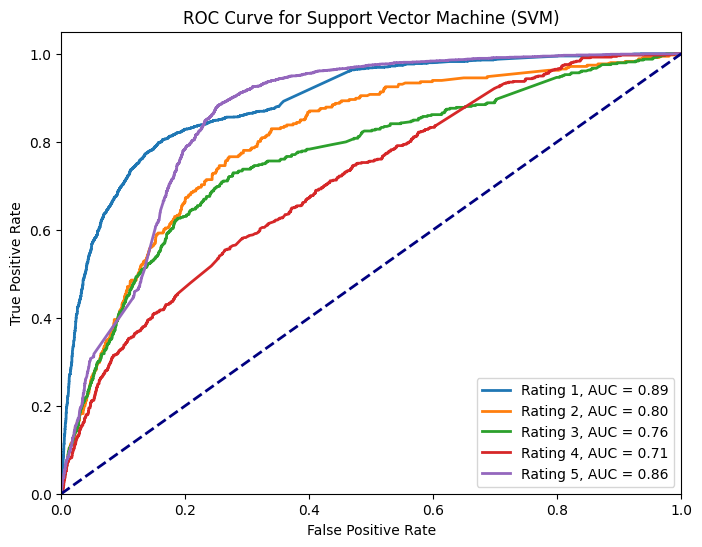

Accuracy: 0.69
Precision: 0.64
F1 Score: 0.64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Prepare the data
X = thread['review_description']
y = thread['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Function to evaluate and plot ROC curve for multiclass classification
def evaluate_model(model, model_name):
    model.fit(X_train_tfidf, y_train)
    y_pred_prob = model.predict_proba(X_test_tfidf)

    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    accuracy = accuracy_score(y_test, model.predict(X_test_tfidf))
    precision = precision_score(y_test, model.predict(X_test_tfidf), average='weighted')
    f1 = f1_score(y_test, model.predict(X_test_tfidf), average='weighted')

    plt.figure(figsize=(8, 6))
    for i in range(5):  # Assuming there are 5 classes (ratings 1 to 5)
        fpr, tpr, _ = roc_curve(y_test == (i + 1), y_pred_prob[:, i])
        roc_auc_curve = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Rating {i+1}, AUC = {roc_auc_curve:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")


# Train and evaluate Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg, 'Logistic Regression')

# Train and evaluate Multinomial Naive Bayes model
naive_bayes = MultinomialNB()
evaluate_model(naive_bayes, 'Multinomial Naive Bayes')

# Train and evaluate Support Vector Machine (SVM) model
svm_model = SVC(probability=True, random_state=42)
evaluate_model(svm_model, 'Support Vector Machine (SVM)')


In [18]:
new_reviews = [
    "Great app, very user-friendly and intuitive!",
    "The worst app I've ever used. It's full of bugs!",
    "Average experience. Nothing extraordinary.",
    "Highly recommended. Excellent features!",
    "Not bad, but needs improvement.",
    "Superb app! I'm impressed with its performance.",
    "Terrible app, keeps crashing.",
    "Decent app, but lacks some essential features.",
    "I love this app. It's perfect for my needs!",
    "Could be better. Needs more updates."
]

# Vectorize the new review descriptions
X_new_tfidf = vectorizer.transform(new_reviews)

# Predict ratings for new reviews using each model
print("Predicted Ratings using Logistic Regression:")
print(log_reg.predict(X_new_tfidf))

print("Predicted Ratings using Multinomial Naive Bayes:")
print(naive_bayes.predict(X_new_tfidf))

print("Predicted Ratings using Support Vector Machine (SVM):")
print(svm_model.predict(X_new_tfidf))

Predicted Ratings using Logistic Regression:
[5 1 1 5 3 5 1 4 5 4]
Predicted Ratings using Multinomial Naive Bayes:
[5 1 1 5 4 5 1 4 5 5]
Predicted Ratings using Support Vector Machine (SVM):
[5 1 1 5 3 5 1 4 5 4]
